The project we'll be doing in here is **Bear Detector**. It will discriminate between three types of bear: *grizzly, black, and teddy bears*. There are many images on the internet of each type of bear that we can use. We just need a way to find them and download them. 

In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [5]:
from jmd_imagescraper.core import * 

In [24]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

We will be using the **jmd_imagescraper** library (https://github.com/joedockrill/jmd_imagescraper/) to gather the image datasets.

In [30]:
if not path.exists():
    path.mkdir()
    
for o in bear_types:
    duckduckgo_search(path, o, f'{o} bear', max_results=150)

Duckduckgo search: grizzly bear


Duckduckgo search: black bear


Duckduckgo search: teddy bear


In [32]:
fns = get_image_files(path)
fns

(#450) [Path('bears/black/132_73963b22.jpg'),Path('bears/black/008_a0b6e1ca.jpg'),Path('bears/black/131_1440e491.jpg'),Path('bears/black/048_e111aab6.jpg'),Path('bears/black/086_d0c7599d.jpg'),Path('bears/black/023_845bb82b.jpg'),Path('bears/black/036_223c6410.jpg'),Path('bears/black/126_71c0195e.jpg'),Path('bears/black/006_48b972c3.jpg'),Path('bears/black/145_96de56bf.jpg')...]

In [33]:
failed = verify_images(fns)
failed

(#0) []

If the above list is not empty, i.e., there are items in the data which are not images, following command helps to purge those items.

In [ ]:
failed.map(Path.unlink);

Having gathered the relevant data, now it is time to build a model. For that purpose, it is first important to tell fastai what kind of data we have and how it is structured. A flexible way to provide this information is via the `DataBlock` API in fastai.

In [39]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [40]:
dls = bears.dataloaders(path)

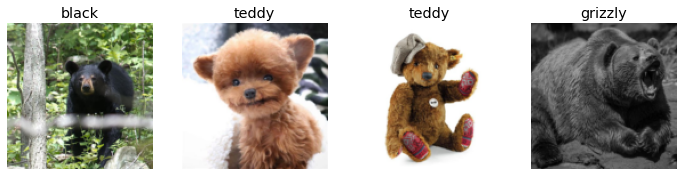

In [41]:
dls.valid.show_batch(max_n=4, nrows=1)